In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
def readfile(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:,0].values.reshape(-1,1)
    Y = data.iloc[:, 1].values.reshape(-1,1)
    plt.title('Salary VS Experience Data( Training Set )')
    plt.scatter(X, Y)
    plt.show()
    return X, Y

In [4]:
# Building the model with least square root method
def buildModel(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    num = 0
    den = 0
    for i in range(len(X)):
        num += (X[i] - X_mean)*(Y[i] - Y_mean)
        den += (X[i] - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    return m,c

In [5]:
# Making predictions
def bestFitLine(X,m,c):
    Y_pred = m*X + c
    return Y_pred

In [6]:
#Plot graph
def plotGraph(X,Y,Y_pred):
    plt.scatter(X, Y) # actual
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
    plt.show()
    return

In [7]:
def predict(x, m,c):
    y_pred = c + m*x
    return y_pred

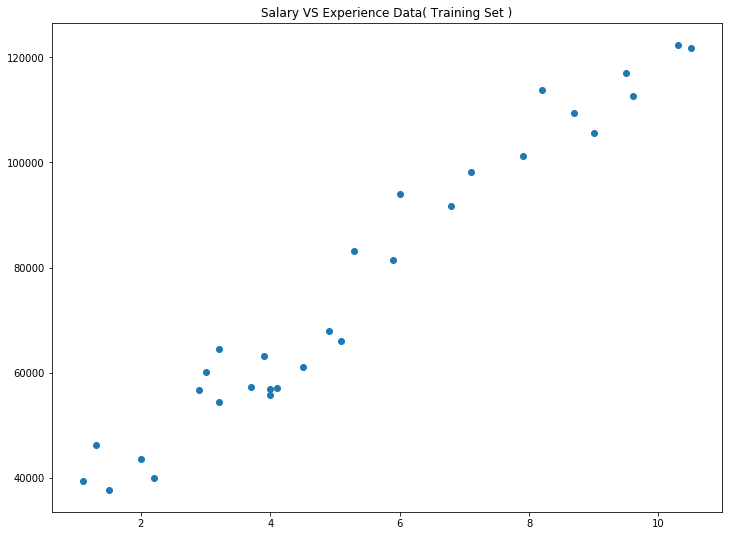

In [13]:
# load the dataset
X, Y = readfile('salary_data.csv')

In [12]:
m,c = buildModel(X,Y)

Y_pred=bestFitLine(X,m,c)
    
df_result = pd.DataFrame({'Years of Experience': X.flatten() ,'Actual': Y.flatten(), 'Predicted': Y_pred.flatten()})
df_result

,Actual,Predicted,Years of Experience
0,39343,36187.158752,1.1
1,46205,38077.151217,1.3
2,37731,39967.143681,1.5
3,43525,44692.124842,2.0
4,39891,46582.117306,2.2
5,56642,53197.090931,2.9
6,60150,54142.087163,3.0
7,54445,56032.079627,3.2
8,64445,56032.079627,3.2
9,57189,60757.060788,3.7


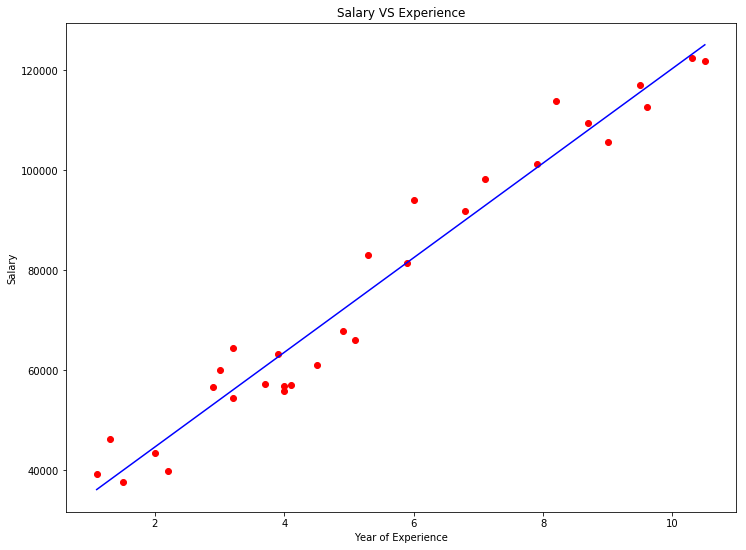

In [14]:
viz_train = plt
viz_train.scatter(X, Y, color='red')
viz_train.plot(X, Y_pred, color='blue')
viz_train.title('Salary VS Experience')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

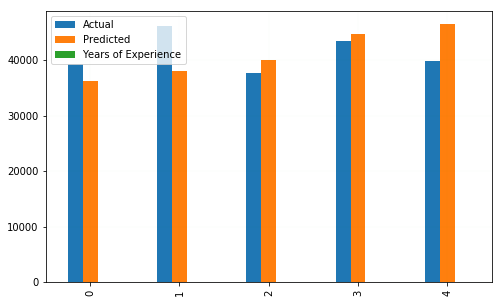

In [15]:
df1 = df_result.head()
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.015', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.015', color='black')
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Absolute Error: 4644.201289443538
Mean Squared Error: 31270951.72228097
Root Mean Squared Error: 5592.043608760662
